(chap-spatialjoin)=
# Aufgabe 14: Spatial Join

## Theorie

In dieser Aufgabe wollen wir für jeden Zeckenstich ermitteln, ob er sich im Wald befindet oder nicht. 

% !! HIER FEHLT EIN TEIL!! 

Jetzt wäre es noch interessant, den Wald-Layer mit den Zeckenstichen zu überlagern. Wie ihr schon in vorherigen Plots von mir bemerkt hat, nutze ich immer das Submodul `pyplot` (importiert mit alias `plt`) aus `matplotlib` wenn ich zwei Layer überlagern oder zwei Plots nebeneinander visualisieren möchte. Wir werden dies nicht weiter in diesem Kurs vertiefen, kopiert einfach den Code in euer Notebook.

<AxesSubplot:>

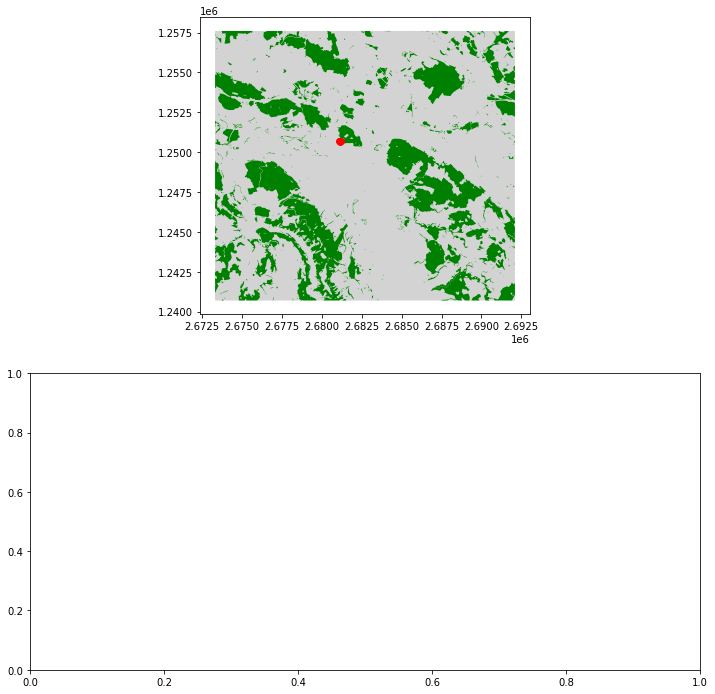

In [59]:
from matplotlib import pyplot as plt

zeckenstiche_gpd = gpd.read_file("zeckenstiche.gpkg")

# Subplots mit 1 Zeile und 1 Spalte
fig, ax = plt.subplots(1, 1, figsize = (12,12))

wald.plot(color = ["Lightgray","Green"], ax = ax)
zeckenstiche_gpd.plot(color = "Red", ax = ax)

### Wie funktioniert ein *Spatial Join*?

In {ref}`chap-pythongis` habt ihr euch mit den GIS-Funktionalitäten von `geopandas` vertraut gemacht. Eine ganz zentrale Funktion in GIS sind die sogenannten "Spatial Joins". Dabei werden Attribute von einem Geodatensatz auf einen anderen Geodatensatz aufgrund einer räumlichen Beziehung der beiden Datensätze übertragen. Konkret auf unsere Zeckenstiche bedeutet dies: Jedem Zeckenstich sollte die Eigenschaft "Wald: ja" / "Wald: nein" aus `wald` zugewiesen werden. Am einfachsten lässt sich dies in einer Darstellung erklären:

```{figure} figures/spatialjoin.jpg
:name: spatialjoin

"Spatial Join" zwischen `zeckenstiche` und `wald`. In diesem Spatial Join wurde die Geometrie von `zeckenstiche` übernommen, das heisst das Resultat des Joins ist ein Punkt-Layer.
```

<AxesSubplot:>

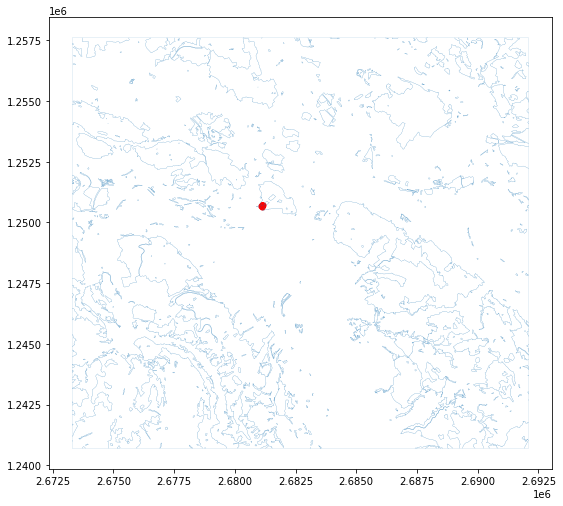

In [2]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(1, figsize=(9, 9))

wald.boundary.plot(linewidth=0.1, ax=ax)
zeckenstiche_gpd.plot(color='red', linewidth=0.1, ax=ax)

In Python wird ein *Spatial Join* zwischen `zeckenstiche` und `wald` wie folgt durchgeführt (wichtig ist dabei auch die Reihenfolge der Argumente: `left_df` bestimmt den Geometrietyp des Outputs):

In [7]:
gpd.sjoin(left_df = zeckenstiche_gpd, right_df = wald)

,ID,accuracy,x,y,geometry,index_right,Shape_Area,Wald_text
0,2550,439.128951,2681116,1250648,POINT (2681116.000 1250648.000),0,2.380876e+08,nein
1,10437,301.748542,2681092,1250672,POINT (2681092.000 1250672.000),0,2.380876e+08,nein
2,9174,301.748542,2681128,1250683,POINT (2681128.000 1250683.000),0,2.380876e+08,nein
3,8773,301.748542,2681111,1250683,POINT (2681111.000 1250683.000),0,2.380876e+08,nein
4,2764,301.748529,2681131,1250692,POINT (2681131.000 1250692.000),0,2.380876e+08,nein
5,2513,301.748529,2681171,1250711,POINT (2681171.000 1250711.000),1,7.963237e+07,ja
6,9185,301.748542,2681107,1250712,POINT (2681107.000 1250712.000),1,7.963237e+07,ja
7,28521,301.748542,2681124,1250720,POINT (2681124.000 1250720.000),1,7.963237e+07,ja
8,26745,301.748542,2681117,1250725,POINT (2681117.000 1250725.000),1,7.963237e+07,ja
9,27391,301.748542,2681138,1250725,POINT (2681138.000 1250725.000),1,7.963237e+07,ja


## Übungen

(ex-import-wald)=
### Übung 14.1

Lade [hier das File "wald.gpgk"](https://github.com/ratnanil/codingingis/raw/master/wald.gpkg) herunter (Rechtsklick > Speichern unter) uns speichere es in deiner Workings Directory. Importiere den Datensatz und speichere ihn in der Variable `wald`. 

Schau dir `wald` an (mit `type`, `.plot()` etc.)

In [9]:
# Musterlösung

wald = gpd.read_file("wald.gpkg")

wald
type(wald)
wald.plot()

<AxesSubplot:>

(ex-spatialjoin)=
### Übung 14.2

Führe einen SpatialJoin zwischen `wald` und `zeckenstiche` durch. Vertausche die Reihenfolge (`left_df`, `right_df`) und schaue dir den Output an. Was ist hier passiert?

In [11]:
# Musterlösung

gpd.sjoin(left_df = zeckenstiche_gpd, right_df = wald) 
gpd.sjoin(left_df = wald, right_df = zeckenstiche_gpd) 

# in beiden Fällen hat der Output geich viele Zeilen. In der ersten Variante ist die Geometrie
# des Outputs "Point", im zweiten Fall "Multipolygon"

,Shape_Area,Wald_text,geometry,index_right,ID,accuracy,x,y
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,1,10437,301.748542,2681092,1250672
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,3,8773,301.748542,2681111,1250683
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,0,2550,439.128951,2681116,1250648
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,2,9174,301.748542,2681128,1250683
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,4,2764,301.748529,2681131,1250692
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,6,9185,301.748542,2681107,1250712
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,8,26745,301.748542,2681117,1250725
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,7,28521,301.748542,2681124,1250720
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,9,27391,301.748542,2681138,1250725
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,5,2513,301.748529,2681171,1250711
